# Projeto - Análise Preditiva Renda Anual

Nesse script o objetivo será fazer uma análise preditiva com dados de pessoas que tiveram ou não diabetes usando um modelo de regressão logística. Com base nos sintomas apresentados, o modelo poderá fazer uma previsão aproximada se a pessoa terá ou não diabates. O objetivo do modelo é ter uma acurácia acima de 80% pelo menos.

In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando os datasets de treino e teste
df_1 = pd.read_csv('C:/python_scripts/income_predict/adult_train.csv')
df_2 = pd.read_csv('C:/python_scripts/income_predict/adult_test.csv')

In [3]:
# Combinando os datasets para o pré-processamento de dados
df_full = df_1.append(df_2)

In [4]:
# Conferindo a quantidade de linhas e confirmando que a junção dos dataset está correta
print(df_1.shape, df_2.shape, df_full.shape)

(32561, 15) (16281, 15) (48842, 15)


## Dicionário de Dados

Neste seção do Jupyter Notebook, será registrado o dicionário de dados do dataset utilizado nesse projeto. O dataset foi feito com base em uma pesquisa de renda anual de pessoas que residem nos E.U.A no ano de 1996. Os dados foram disponibilizados no repositório de Machine Learning da UCI.

Atributos listados

    Variável target:

- 50K, <=50K.

    Variáveis preditoras:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Etapa 1 - Análise Exploratória dos Dados

Neste capítulo será feito uma análise exploratória dos dados para analisar insights que podem ser importantes nas próximas etapas da análise.

In [5]:
# Ajuste no label da variável target
df_full = df_full.replace(to_replace = [' >50K',' <=50K'], value = [1,0])
df_full = df_full.replace(to_replace = [' >50K.',' <=50K.'], value = [1,0])
df_full[' income'].unique()

array([0, 1], dtype=int64)

In [6]:
# Visualizando os dados
df_full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
# Verificar se o dataset tem valores nulos.
# Não há valores nulos, mas sabemos temos valores nulos com outros caracteres ("?") conforme informado
df_full.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [8]:
# Tipos de dados
df_full.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income             int64
dtype: object

Text(0.5, 1.0, 'Histograma - Idade')

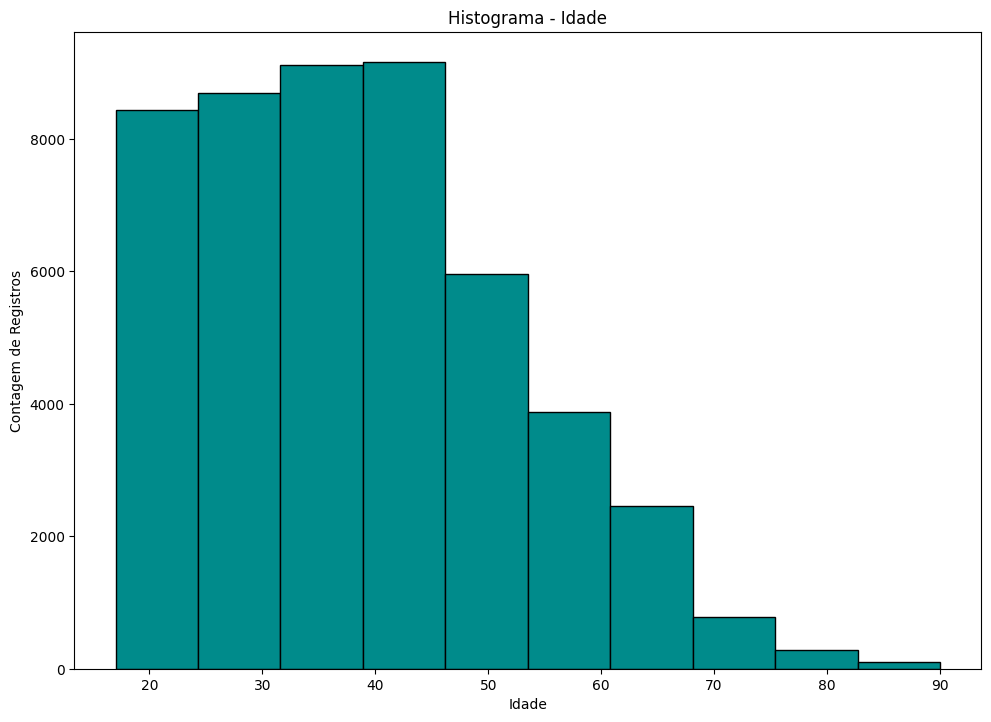

In [9]:
# Ao analisar o histograma das idades, vemos que a distribuição parece seguir uma normal. 
# Contudo, como temos mais de uma variável numérica será necessário padronizar os dados

fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.hist(df_full['age'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('Idade')
plt.title('Histograma - Idade')

Text(0.5, 1.0, 'Histograma - Quantidades Pessoas que Responderam a Pesquisa')

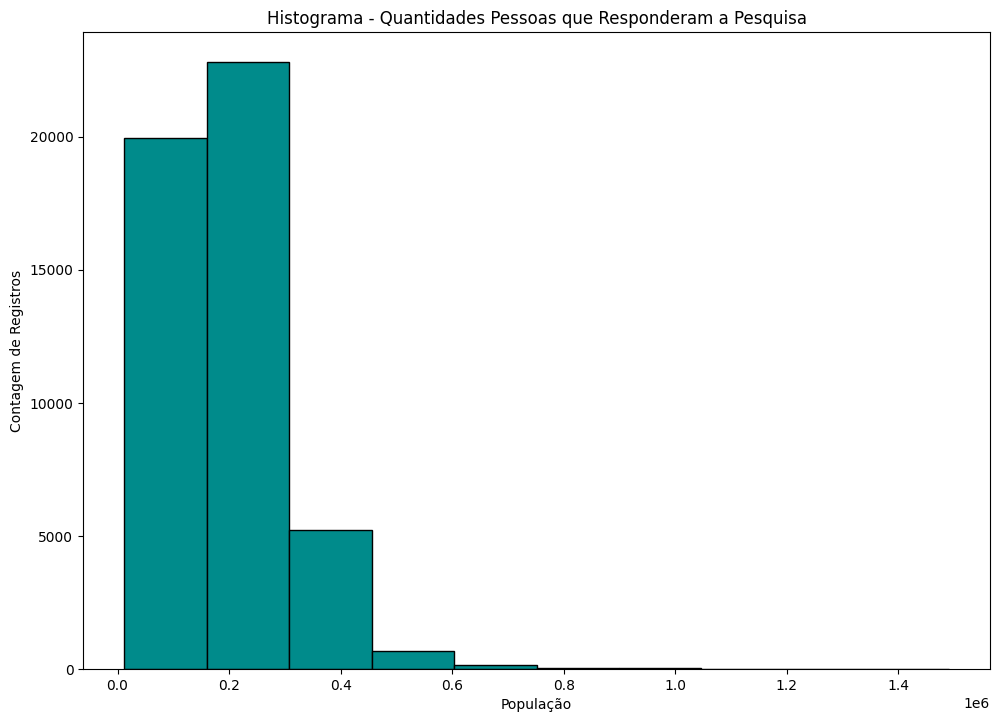

In [10]:
# O registro mais frequente é em torno de 200.000 pessoas respondendo a pesquisa.

fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.hist(df_full[' fnlwgt'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('População')
plt.title('Histograma - Quantidades Pessoas que Responderam a Pesquisa')

Text(0.5, 1.0, 'Histograma - Horas por Semana')

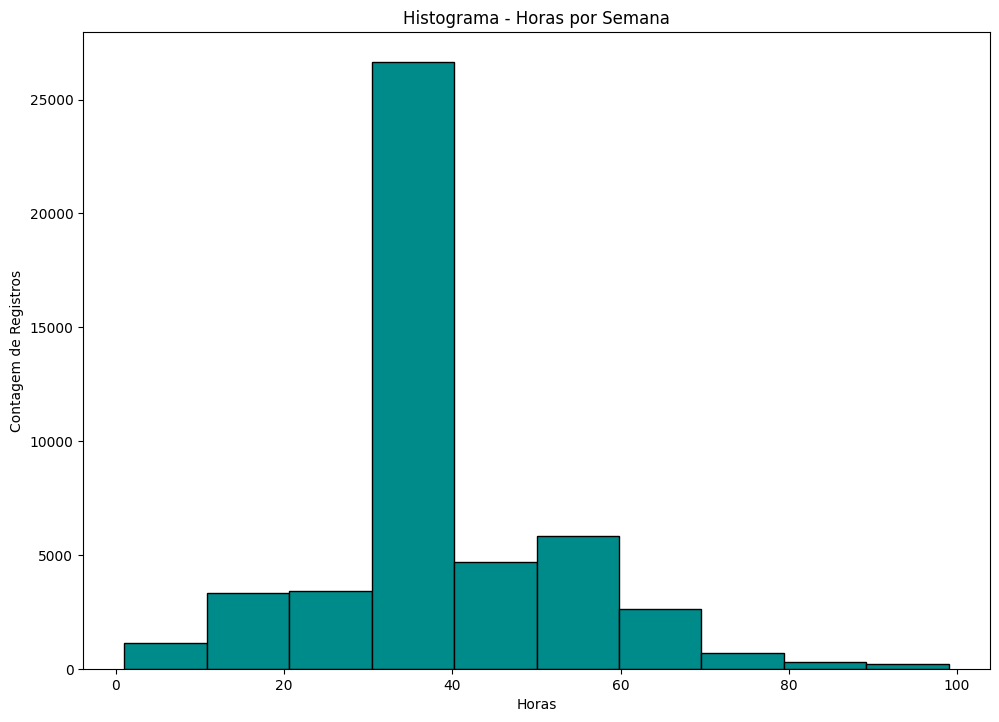

In [11]:
# No gráfico de horas por semans, temos a maioria dos registros em torno de 40Hrs por semana
# O que é esperado para a maioria da população

fig, ax = plt.subplots(figsize=(11.7, 8.27))
plt.hist(df_full[' hours-per-week'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('Horas')
plt.title('Histograma - Horas por Semana')

Text(0.5, 1.0, 'Distribuição Renda por Genêro')

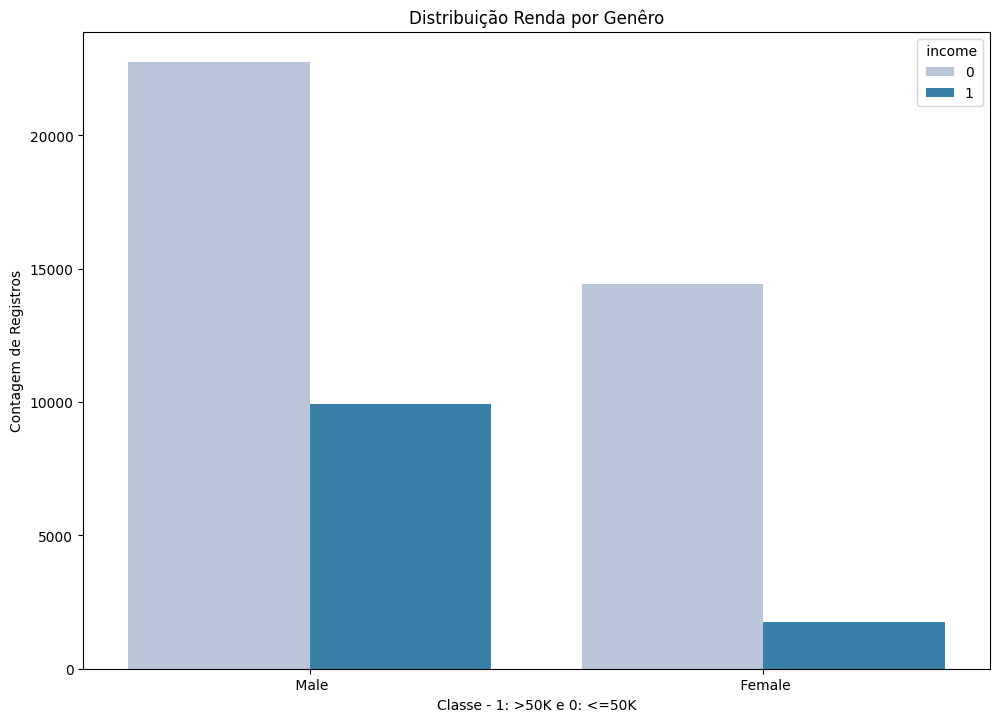

In [12]:
# No gráfico de barras, vemos que temos mais homens com renda superior a 50K por mês do que mulheres.
# A própria classe genêro não está totalmente balanceada com mais homens do que mulheres.

fig, ax = plt.subplots(figsize=(11.7, 8.27))
graf_class = sns.countplot(x = ' sex', data = df_full, palette = 'PuBu', hue = ' income', orient = 'H')
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Genêro')

Text(0.5, 1.0, 'Distribuição Renda por Genêro')

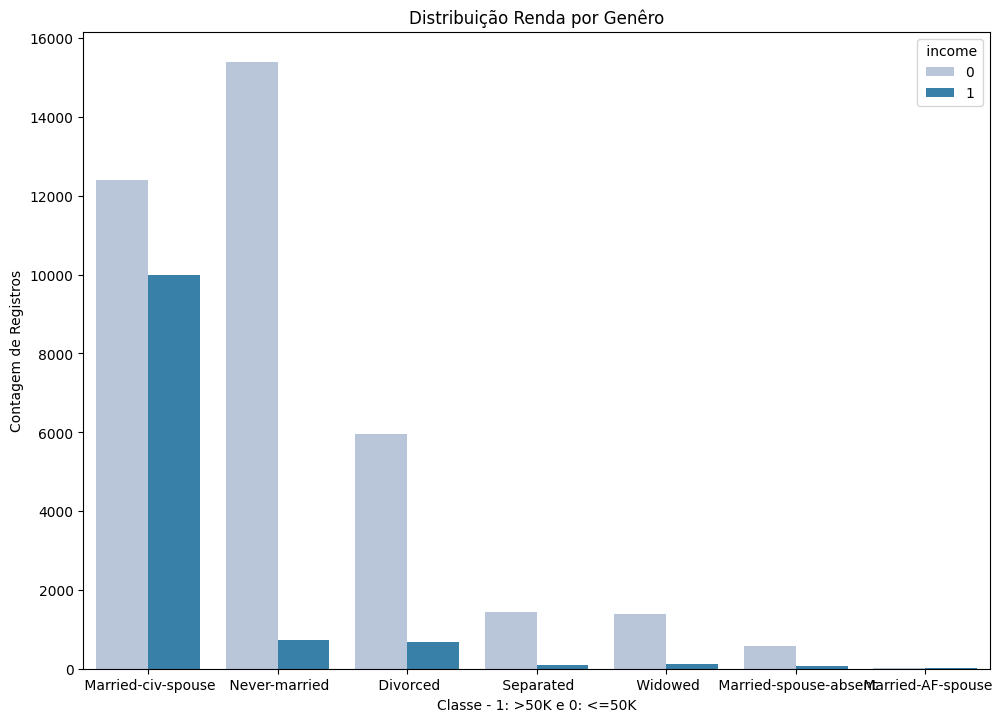

In [13]:
# No gráfico vemos que a pessoas com renda superior a 50K/mês estão mais concentradas nos casados.

fig, ax = plt.subplots(figsize=(11.7, 8.27))
graf_class = sns.countplot(x = ' marital-status', 
                           data = df_full, 
                           palette = 'PuBu', 
                           hue = ' income',
                          order=df_full[' marital-status'].value_counts().index)
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Genêro')

Text(0.5, 1.0, 'Distribuição Renda por Escolaridade')

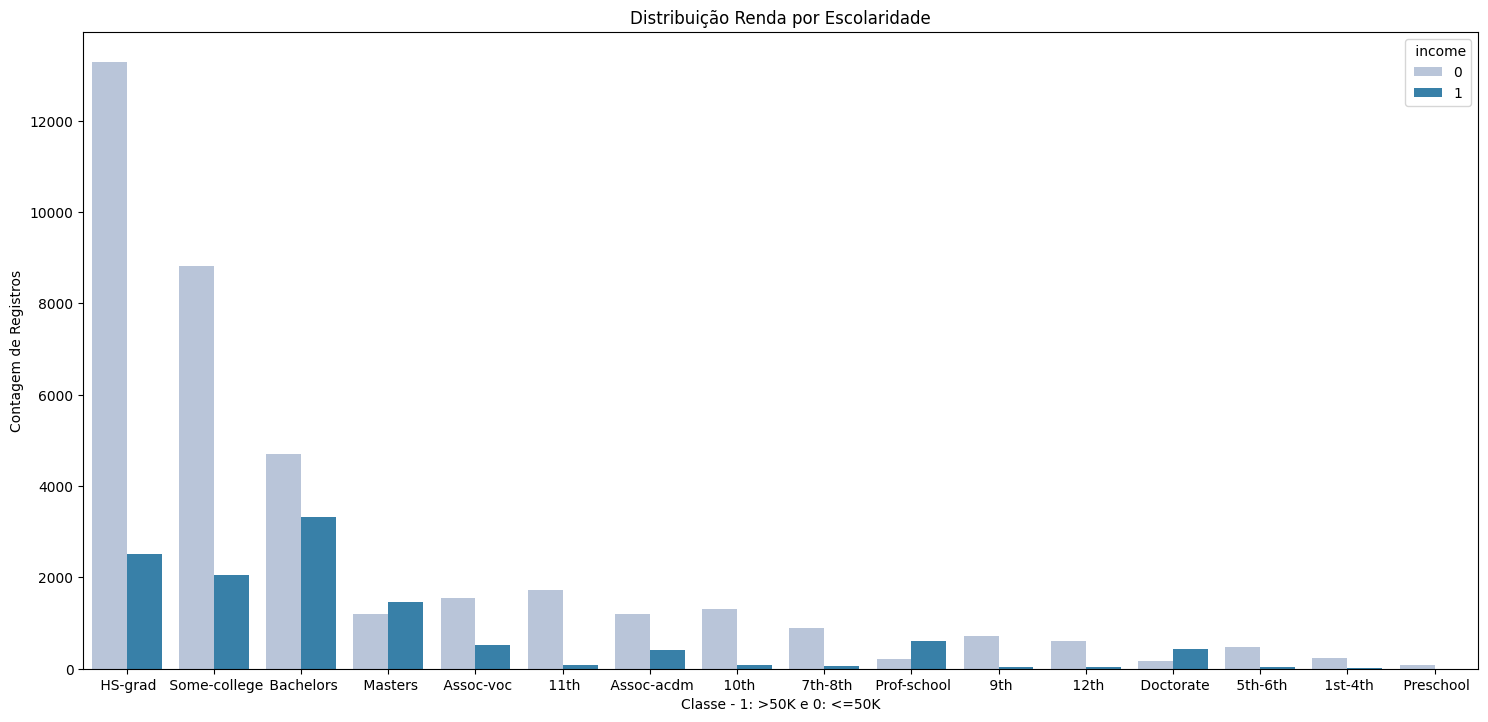

In [14]:
# No gráfico é possível observar que quanto maior a escolaridade, a tendência é ter uma renda maior.

fig, ax = plt.subplots(figsize=(18.0, 8.27))
graf_class = sns.countplot(x = ' education', 
                           data = df_full, 
                           palette = 'PuBu', 
                           hue = ' income', 
                           order=df_full[' education'].value_counts().index)
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Escolaridade')

Text(0.5, 1.0, 'Distribuição Renda por Raça')

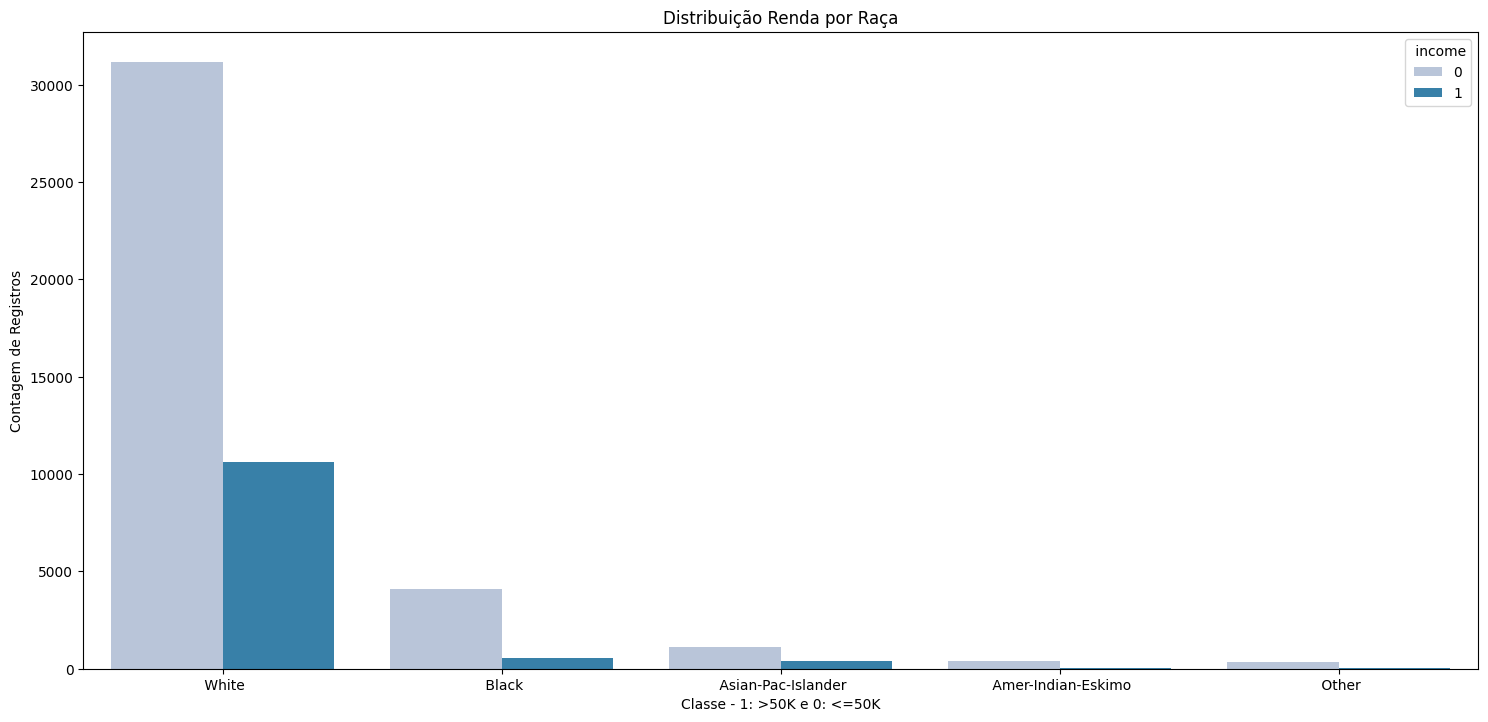

In [15]:
# No gráfico com a visão por raça, vemos que a maioria dos registros são de pessoas brancas
# Os brancos também possuem a maior parcela de pessoas com renda superior a US$ 50K

fig, ax = plt.subplots(figsize=(18.0, 8.27))
graf_class = sns.countplot(x = ' race', 
                           data = df_full, 
                           palette = 'PuBu', 
                           hue = ' income', 
                           order=df_full[' race'].value_counts().index)
graf_class.set_xlabel('Classe - 1: >50K e 0: <=50K')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição Renda por Raça')

## ETAPA 2 - PRÉ-PROCESSAMENTO DOS DADOS
Nesta etapa será aplica todas as transformações necessárias antes de aplicar os dados ao modelo de árvore de decisão e random forest.

In [16]:
# Cria novo dataset para manter o original
df_modelo = df_full

In [17]:
# Ajuste no nome das colunas
nomes = df_modelo.columns.str.replace(" ","")
df_modelo.set_axis(nomes, axis = 'columns', inplace = True)
df_modelo.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [18]:
# Conferindo valores únicos das colunas

print('workclass \n')
print(df_modelo['workclass'].unique())
print('--------------------------------------------------------------------- \n')
    
print('education \n')
print(df_modelo['education'].unique())
print('--------------------------------------------------------------------- \n')

print('marital-status \n')
print(df_modelo['marital-status'].unique())
print('--------------------------------------------------------------------- \n')

print('occupation \n')
print(df_modelo['occupation'].unique())
print('--------------------------------------------------------------------- \n')

print('relationship \n')
print(df_modelo['relationship'].unique())
print('--------------------------------------------------------------------- \n')

print('race \n')
print(df_modelo['race'].unique())
print('--------------------------------------------------------------------- \n')

print('native-country \n')
print(df_modelo['native-country'].unique())
print('--------------------------------------------------------------------- \n')

print('occupation \n')
print(df_modelo['occupation'].unique())
print('--------------------------------------------------------------------  \n')

workclass 

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------------------------- 

education 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------------------------- 

marital-status 

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
--------------------------------------------------------------------- 

occupation 

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
------------------------------------

In [19]:
# Nas linhas também existem valores em branco. Comandos para remover esses espaços a fim de não prejudicar a modelagem preditiva
df_modelo['workclass'] = df_modelo['workclass'].str.strip()
df_modelo['education'] = df_modelo['education'].str.strip()
df_modelo['marital-status'] = df_modelo['marital-status'].str.strip()
df_modelo['occupation'] = df_modelo['occupation'].str.strip()
df_modelo['relationship'] = df_modelo['relationship'].str.strip()
df_modelo['race'] = df_modelo['race'].str.strip()
df_modelo['native-country'] = df_modelo['native-country'].str.strip()
df_modelo['occupation'] = df_modelo['occupation'].str.strip()

In [20]:
# Conferindo valores únicos das linhas no dataset e não há mais espaços em branco

print('workclass \n')
print(df_modelo['workclass'].unique())
print('--------------------------------------------------------------------- \n')
    
print('education \n')
print(df_modelo['education'].unique())
print('--------------------------------------------------------------------- \n')

print('marital-status \n')
print(df_modelo['marital-status'].unique())
print('--------------------------------------------------------------------- \n')

print('occupation \n')
print(df_modelo['occupation'].unique())
print('--------------------------------------------------------------------- \n')

print('relationship \n')
print(df_modelo['relationship'].unique())
print('--------------------------------------------------------------------- \n')

print('race \n')
print(df_modelo['race'].unique())
print('--------------------------------------------------------------------- \n')

print('native-country \n')
print(df_modelo['native-country'].unique())
print('--------------------------------------------------------------------- \n')

print('occupation \n')
print(df_modelo['occupation'].unique())
print('--------------------------------------------------------------------  \n')

workclass 

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------------------------- 

education 

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------------------------- 

marital-status 

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------------------------- 

occupation 

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
--------------------------------------------------------------------- 

relationshi

In [21]:
# Variável education num será excluída porque já existe uma variável que trata da escolaridade
df_modelo.drop('education-num', inplace = True, axis = 1)
df_modelo.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## NOTA

Como já existe um script para balanceamento de classes em outro jupyter notebook, este será utilizado novamente nesta análise. Outro ponto são as variáveis dummy, como no R isso é feito de forma fácil usando o Caret, também será utilizado o mesmo modelo para a análise.

In [22]:
# Exporta dataset para variáveis uso do Caret e balanceamento de classes
# Cria CSV no diretório
df_modelo.to_csv('df_final_python.csv', index = False)

In [24]:
# Carga dos dados processados pelo Caret no RStudio
bd_modelo = pd.read_csv('C:/python_scripts/income_predict/df_modelo_python.csv', sep = ';')
bd_modelo.head()

,age,workclass.Local.gov,workclass.Private,workclass.Self.emp.inc,workclass.Self.emp.not.inc,workclass.State.gov,workclass.Without.pay,fnlwgt,education.11th,education.12th,...,native.country.Puerto.Rico,native.country.Scotland,native.country.South,native.country.Taiwan,native.country.Thailand,native.country.Trinadad.Tobago,native.country.United.States,native.country.Vietnam,native.country.Yugoslavia,income
0,39,0,0,0,0,1,0,77516,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,0,0,0,1,0,0,83311,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,0,1,0,0,0,0,215646,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,1,0,0,0,0,234721,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,0,1,0,0,0,0,338409,0,0,...,0,0,0,0,0,0,0,0,0,0


## ETAPA 3 - MACHINE LEARNING

Nesta etapa será processado os modelos com Árvore de Decisão e Random Forest no conjunto de dados que foi processados com o Caret pela linguagem R.

In [26]:
# Divisão de x e y para uso do TRAIN, TESTE e SPLIT
x = bd_modelo.iloc[:, 0:97]
y = bd_modelo.iloc[:, 97]

In [27]:
# Divisão dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

#### Modelo 1 - Árvore de Decisão

In [28]:
# Cria o modelo
modelo_arvore = DecisionTreeClassifier()

In [29]:
# Fit do modelo
modelo_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [30]:
# Previsões com o modelo
previsoes_2 = modelo_arvore.predict(x_teste)

In [31]:
# Dados do Modelo
# O modelo apresentou resultados satisfatórios com uma precisão e acurácia acima de 85%.

DecisionTree_model = {'Modelo':'Árvore de Decisão',
                  'Precision':round(precision_score(previsoes_2, y_teste),4),
                  'Recall':round(recall_score(previsoes_2, y_teste),4),
                  'F1 Score':round(f1_score(previsoes_2, y_teste),4),
                  'Acurácia':round(accuracy_score(previsoes_2, y_teste),4),
                  'AUC':round(roc_auc_score(y_teste, previsoes_2),4)}



print('Resultado do Modelo 2:\n')
DecisionTree_model

Resultado do Modelo 2:



{'Modelo': 'Árvore de Decisão',
 'Precision': 0.8708,
 'Recall': 0.8606,
 'F1 Score': 0.8657,
 'Acurácia': 0.8649,
 'AUC': 0.8649}

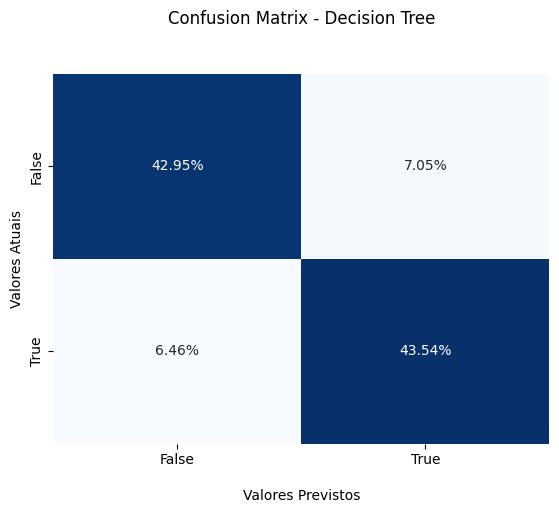

In [32]:
# Confusion Matrix
# Ao analisar a Confusion Matrix, vemos que o modelo teve um ótimo desempenho.
# O True Negative e True Positive tiveram um acerto  muito bom, indicando que o modelo aprendeu corretamente e possui pouco viés na classificação.

cf_matrix = confusion_matrix(y_teste, previsoes_2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix - Decision Tree\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### Modelo 3 - Random Forest

In [33]:
# Cria o modelo
modelo_RandomForest = RandomForestClassifier()

In [34]:
# Fit do modelo
modelo_RandomForest.fit(x_treino, y_treino)

RandomForestClassifier()

In [35]:
# Previsões com o modelo
previsoes_3 = modelo_RandomForest.predict(x_teste)

In [36]:
# Dados do Modelo
# O modelo apresentou resultados satisfatórios com uma precisão e acurácia acima de 88%.

RandomForest_model = {'Modelo':'Random Forest',
                  'Precision':round(precision_score(previsoes_3, y_teste),4),
                  'Recall':round(recall_score(previsoes_3, y_teste),4),
                  'F1 Score':round(f1_score(previsoes_3, y_teste),4),
                  'Acurácia':round(accuracy_score(previsoes_3, y_teste),4),
                  'AUC':round(roc_auc_score(y_teste, previsoes_3),4)}



print('Resultado do Modelo 3:\n')
RandomForest_model

Resultado do Modelo 3:



{'Modelo': 'Random Forest',
 'Precision': 0.8838,
 'Recall': 0.9044,
 'F1 Score': 0.894,
 'Acurácia': 0.8952,
 'AUC': 0.8952}

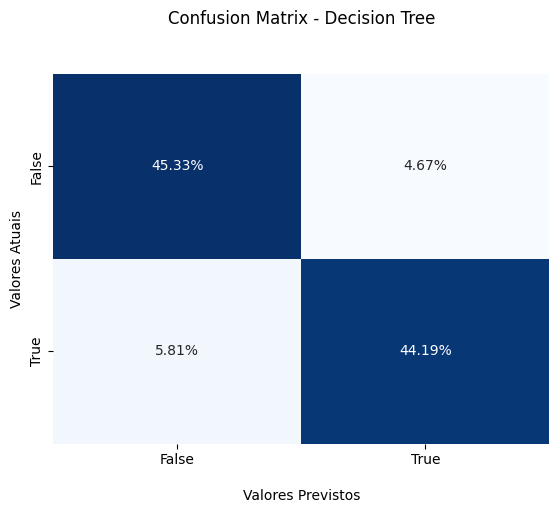

In [37]:
# Confusion Matrix
# Ao analisar a Confusion Matrix, vemos que o modelo teve um ótimo desempenho.
# O True Negative e True Positive tiveram um acerto  muito bom, indicando que o modelo aprendeu corretamente e possui pouco viés na classificação.

cf_matrix = confusion_matrix(y_teste, previsoes_3)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix - Decision Tree\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### ETAPA 4 - CONCLUSÃO

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

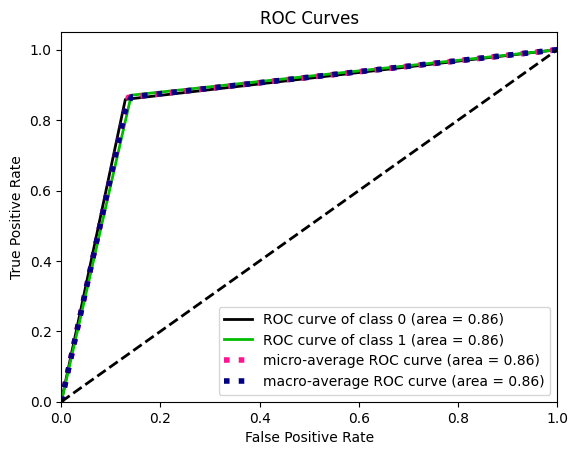

In [39]:
# Gráfico 2 - Árvore de Decisão
y_probas_decisiontree = modelo_arvore.predict_proba(x_teste)
skplt.metrics.plot_roc_curve(y_teste, y_probas_decisiontree)

No caso da curva ROC com a árvore de decisão, temos uma resultado aparentemente melhor com 86% de acurácia.

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

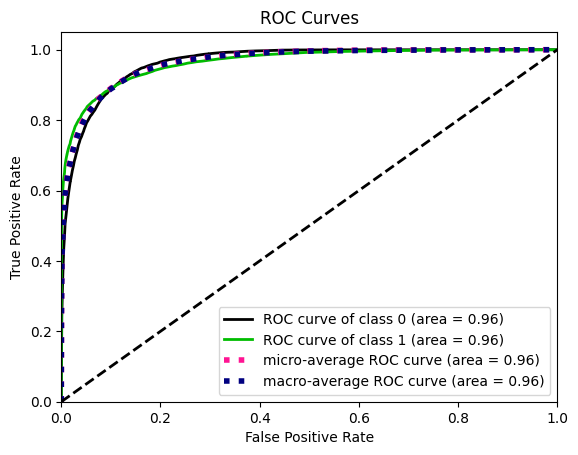

In [40]:
# Gráfico 3 - Random Forest
y_probas_randomforest = modelo_RandomForest.predict_proba(x_teste)
skplt.metrics.plot_roc_curve(y_teste, y_probas_randomforest)

No caso da curva ROC com Random Forest, temos uma resultado aparentemente melhor com 96% de acurácia. 

Em relação aos 2 modelos, a melhor escolha seria com Random Forest porque teve a melhor acurária. Vale lembrar que o modelo tem um erro aproximado visto que a fórmula matemática por trás do modelo são de aproximação. O ideal é que se tenha alguma margem de erro para evitar modelos com overfitting. 